In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
path = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
IMAGE_SHAPE =(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer(path,input_shape = IMAGE_SHAPE+(3,))
])

In [3]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)

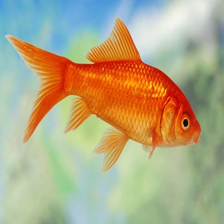

In [4]:
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [7]:
result = classifier.predict(gold_fish[np.newaxis,...])
result.shape

(1, 1001)

In [8]:
np.argmax(result)

2

In [9]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [10]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [11]:
flowers_images_dict = dict()
flower_name = ['roses','daisy','dandelion','sunflowers','tulips']
flowers_labes_dict = {name: idx for idx,name in enumerate(flower_name)}


for name in flower_name:
    flowers_images_dict[name] = list(data_dir.glob(name+'/*'))
len(flowers_images_dict['roses'])

641

In [12]:
flowers_labes_dict['roses']

0

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [14]:
X,y = [],[]


for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labes_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=0)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
plt.imshow(X[0])